# Importing Data 

In [95]:
import pandas as pd 
import sqlite3

In [96]:
!ls zippedData/

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tmdb.movies.csv.gz
im.db                   rt.reviews.tsv.gz       tn.movie_budgets.csv.gz


In [97]:
conn = sqlite3.connect("zippedData/im.db")

In [98]:
bom = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [99]:
# 1
bom.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [100]:
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [101]:
movies.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [102]:
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [103]:
movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Questions 
- What studio had the greatest total gross earnings? 
- What type of relationship is there between production budget and worldwide gross earnings?
- What release date had the greatest gross earnings? 

## What studio had the greatest total gross earnings ?

In [104]:
len(bom)

3387

In [105]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [184]:
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [196]:
domestic_gross = bom.loc[:,"domestic_gross"].fillna(0)
print(domestic_gross)

0       415000000.0
1       334200000.0
2       296000000.0
3       292600000.0
4       238700000.0
           ...     
3382         6200.0
3383         4800.0
3384         2500.0
3385         2400.0
3386         1700.0
Name: domestic_gross, Length: 3387, dtype: float64


Filling null values with 0 is resonable to assume that they did not have any gross. 

In [202]:

foreign_gross = bom.loc[:,"foreign_gross"].str.replace(",","").astype(float).fillna(0)

In [203]:
print(foreign_gross)

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            0.0
3383            0.0
3384            0.0
3385            0.0
3386            0.0
Name: foreign_gross, Length: 3387, dtype: float64


In [204]:
bom['total_gross'] = foreign_gross + domestic_gross 

In [205]:
bom

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018,6.200000e+03
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018,4.800000e+03
3384,El Pacto,Sony,2500.0,NaN,2018,2.500000e+03
3385,The Swan,Synergetic,2400.0,NaN,2018,2.400000e+03


In [209]:
studios = bom.groupby('studio')['total_gross'].mean().sort_values(ascending=False)
# make groupby more complicated to set a limit on how many movies each studio produced 

<AxesSubplot:xlabel='studio'>

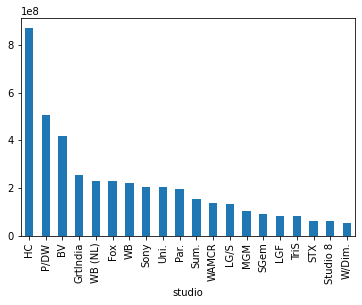

In [215]:
studios[:20].plot(kind = 'bar')

## What type of relationship is there between production budget and worldwide gross earnings?

## What release dates had the greatest gross earnings production?

In [130]:
print(movies)

       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      

In [127]:
print(movie_budgets)

      id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,8

In [145]:
movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [147]:
# I want to merge both release date columns together 
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [148]:
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [149]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [151]:
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [154]:
movies['year'] = movies['release_date'].dt.year

In [156]:
movie_budgets['year'] = movie_budgets['release_date'].dt.year

In [170]:
movies.duplicated(['title','year']).sum()

1120

In [174]:
movies_clean = movies.sort_values(by="popularity", ascending=False).drop_duplicates(['title','year'])

In [175]:
len(movies_clean)

25397

In [169]:
movie_budgets.duplicated(['movie','year']).sum()

1

In [176]:
def movie_budgets_clean(x):
    '''
    A function to clean up money columns
    This removes '$' and ',', and turns the string into a float
    It is designed to be used with .apply on each column
    
    Input: x (string cell in a dataframe)
    Output: float version of x
    '''
    return float(x.replace("$", "").replace(",",""))

In [180]:
for column in['production_budget','domestic_gross','worldwide_gross']:
    movie_budgets[column] = movie_budgets[column].apply(movie_budgets_clean)

In [182]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,2018
5778,79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,2005
5780,81,2015-09-29,A Plague So Pleasant,1400.0,0.0,0.000000e+00,2015


In [ ]:
movie_budgets('')

# CRISP-DM

- Business Understanding
- Data Understanding
    - Data Prep
- Exploratory Data Analysis (EDA)
- Limitations
- Conclusion / Recommendations 
- Next steps (What else could we do with more data?)